In [1]:
#ProstateX final 

#Andrii Trokoz



'''
Importing all the necessary libraries and frameworks in order to start image processing 
'''
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd

In [7]:
#reading .csv in order to get all of necessary coordinates for cropping 

data_all = pd.read_csv('C://Image Processing/ProstateX-TestLesionInformation/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
#data_ktrans = pd.read_csv('C://Image Processing/ProstateX-TestLesionInformation/')
data_all.head()

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8


In [23]:
im = sitk.ReadImage('C://Image Processing/ProstateX/t2/t2_tse_tra_ProstateX_0000.nii')
im_arr = sitk.GetArrayFromImage(im)
im_sl_9 = im_arr[9,:,:]
im_sl_9 = sitk.GetImageFromArray(im_sl_9)

extract = sitk.ExtractImageFilter()
extract.SetSize([256,256])
extract.SetIndex([36, 72])
extracted_image = extract.Execute(im_sl_9)

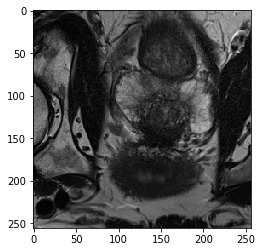

In [24]:
extrcated_arr = sitk.GetArrayFromImage(extracted_image)

plt.imshow(extrcated_arr, cmap = 'gray')